# EDA on Customer Data

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [3]:
df = pd.read_csv("/Volumes/DATA/Assignment/Data/Customers - Customers.csv",header=0)
df_prod = pd.read_csv("/Volumes/DATA/Assignment/Data/Products - Products.csv", header = 0)
df_trans = pd.read_csv("/Volumes/DATA/Assignment/Data/Transactions - Transactions.csv", header =0)

## Preview Of the Data

In [4]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df_prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df_trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Shape of the Data

In [7]:
df.shape

(200, 4)

In [8]:
df_prod.shape

(100, 4)

In [9]:
df_trans.shape

(1000, 7)

## Info of the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


## Description of the Data 
count:

The number of non-null (non-missing) values in each column.
In your case, all columns have 200 non-null entries.
unique:

The number of unique values in each column.
Example:
CustomerID has 200 unique values, meaning each customer has a unique ID.
CustomerName has 200 unique names (no duplicates).
Region has 4 unique values, such as "Asia," "Europe," "South America," etc.
SignupDate has 179 unique dates, meaning some customers signed up on the same date.
top:

The most frequently occurring value (mode) in each column.
Example:
CustomerID: The most frequent value is C0001.
CustomerName: The most frequent name is Lawrence Carroll.
Region: The most common region is South America.
SignupDate: The most frequent signup date is 2024-11-11.
freq:

The frequency (count) of the most frequently occurring value (from the top row).
Example:
CustomerID: C0001 appears 1 time (because IDs are unique).
Region: South America appears 59 times.
SignupDate: 2024-11-11 appears 3 times.

In [13]:
df.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [14]:
df_prod.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [15]:
df_trans.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


## List of Column Names

In [16]:
df.columns.tolist()

['CustomerID', 'CustomerName', 'Region', 'SignupDate']

In [17]:
df_prod.columns.tolist()

['ProductID', 'ProductName', 'Category', 'Price']

In [18]:
df_trans.columns.tolist()

['TransactionID',
 'CustomerID',
 'ProductID',
 'TransactionDate',
 'Quantity',
 'TotalValue',
 'Price']

## Checking for Missing Values

In [19]:
df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [20]:
df_prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [21]:
df_trans.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

## Checking for Duplicate Values

In [22]:
df.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

In [23]:
df_prod.nunique()

ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

In [24]:
df_trans.nunique()

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64

# Exploratory Visualizations


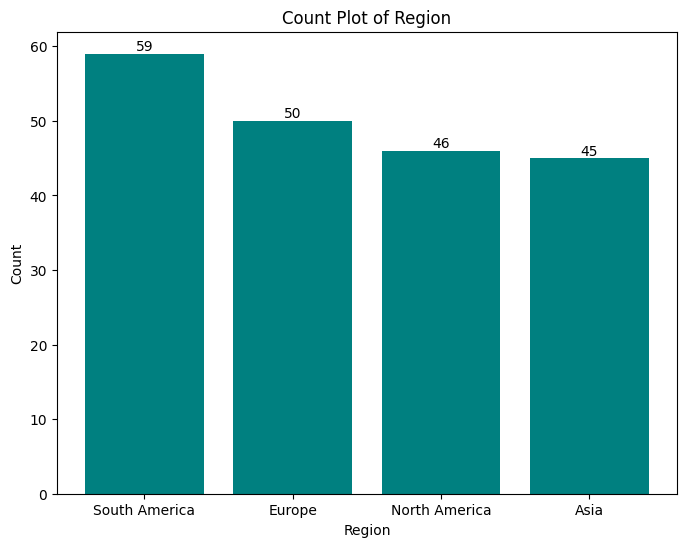

In [25]:
# Count the occurrences of each region
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(region_counts.index, region_counts, color='teal')

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Count Plot of Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

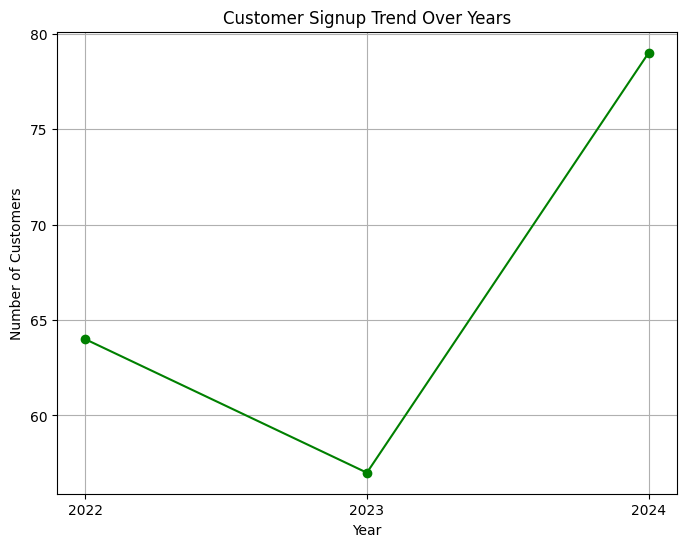

In [26]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

# Extract the year as a period
df['SignupYear'] = df['SignupDate'].dt.to_period('Y')

# Group by year and count the number of signups
signup_trend = df.groupby(df['SignupYear']).size()

# Plot the customer signup trend over years
plt.figure(figsize=(8, 6))
plt.plot(signup_trend.index.astype(str), signup_trend.values, marker='o', color='green')
plt.title('Customer Signup Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()


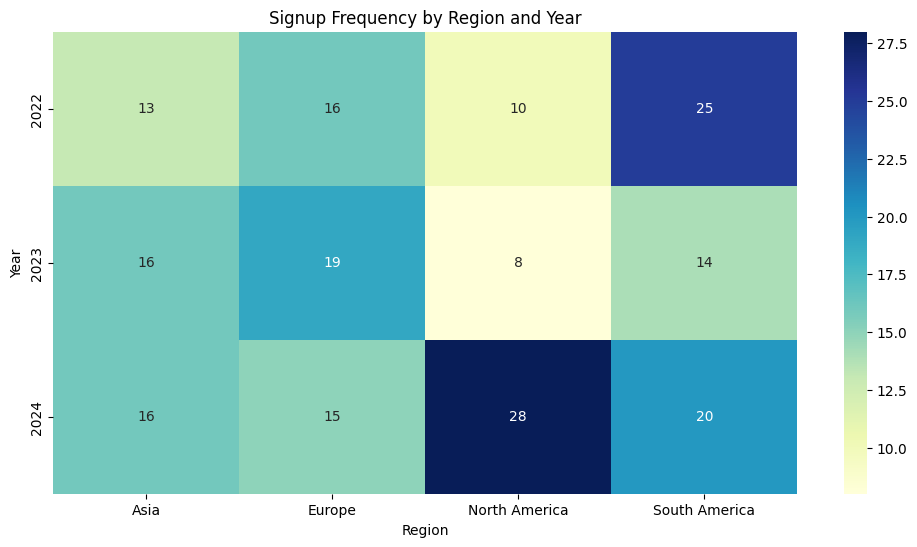

In [27]:
df['SignupYear'] = df['SignupDate'].dt.to_period('Y')
region_year_signup = df.groupby([df['SignupYear'], df['Region']]).size().unstack().fillna(0)

# Heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(region_year_signup, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Signup Frequency by Region and Year')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()


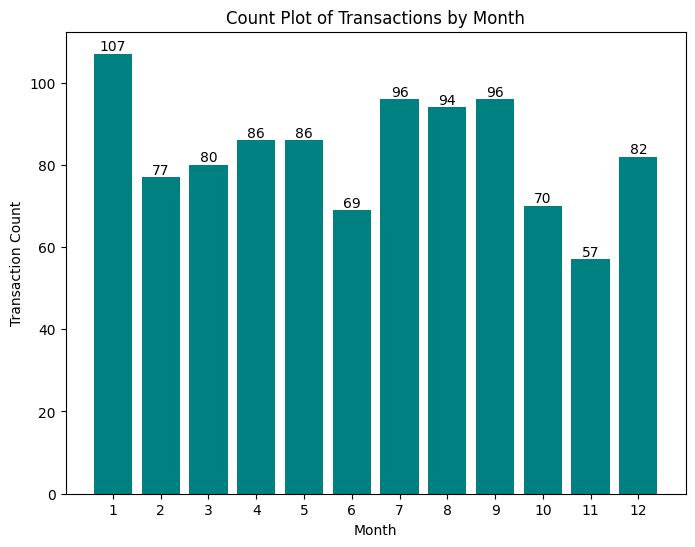

In [29]:
# Convert TransactionDate to datetime if not already
df_trans['TransactionDate'] = pd.to_datetime(df_trans['TransactionDate'])

# Count transactions by month
monthly_counts = df_trans['TransactionDate'].dt.month.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(monthly_counts.index, monthly_counts, color='teal')

# Annotate the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Count Plot of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(range(1, 13))  # Ensure x-axis has labels for all months

plt.show()


In [30]:
tc = pd.merge(df_trans, df, on='CustomerID', how='inner')
full_data = pd.merge(tc, df_prod, on='ProductID', how='inner')
print(full_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate SignupYear  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03       2022   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04       2024   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04       2024   
3      601.36   300.68  Travis Campbell  South America 2024-04-11       2024   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15       2022   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Ele

## Exploratory Analysis
### Top-Performing Products and Categories
- Identified the top 5 products and categories by total sales.
- Visualized sales distribution for better understanding of product performance.



Top 5 Products by Total Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


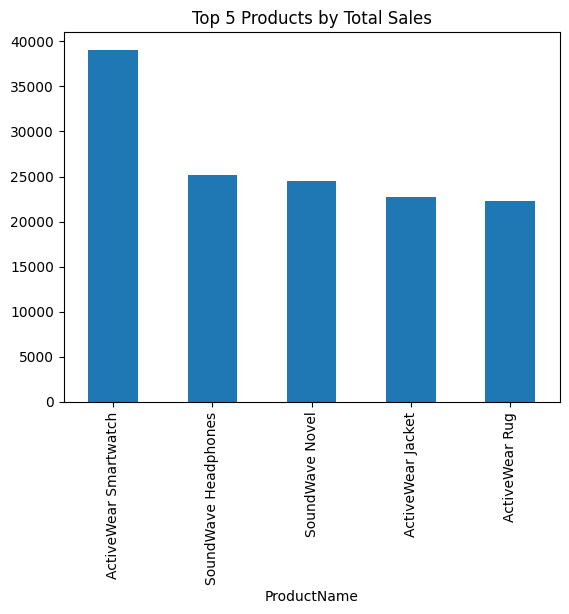

In [31]:
# Top 5 products by total sales
top_products = full_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Total Sales:")
print(top_products)

top_products.plot(kind='bar', title='Top 5 Products by Total Sales')
plt.show()



### Top Categories


Top 5 Categories by Total Sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


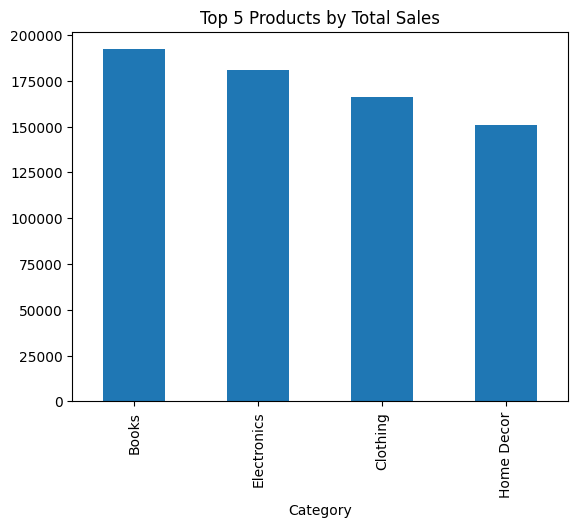

In [32]:
# Top 5 categories by total sales
top_categories = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Categories by Total Sales:")
print(top_categories)

top_categories.plot(kind='bar', title='Top 5 Products by Total Sales')
plt.show()


#### High-Value Customers
- Identified the top 5 customers contributing the most to revenue.
- Highlighted key characteristics of these high-value customers.
### Top Customers

Top 5 Customers by Total Sales:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


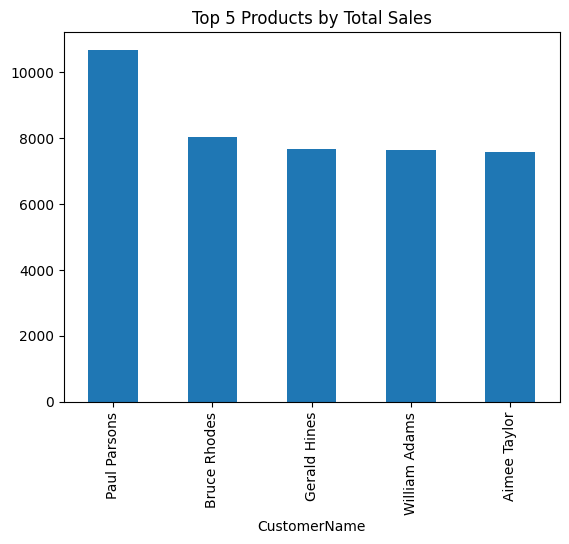

In [33]:
# Top 5 customers by total value
top_customers = full_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Total Sales:")
print(top_customers)

top_customers.plot(kind='bar', title='Top 5 Products by Total Sales')
plt.show()

### Seasonal Sales Patterns
- Explored monthly sales trends to identify peak transaction periods.
- Visualized sales trends over time using line plots.
### Total sales by region


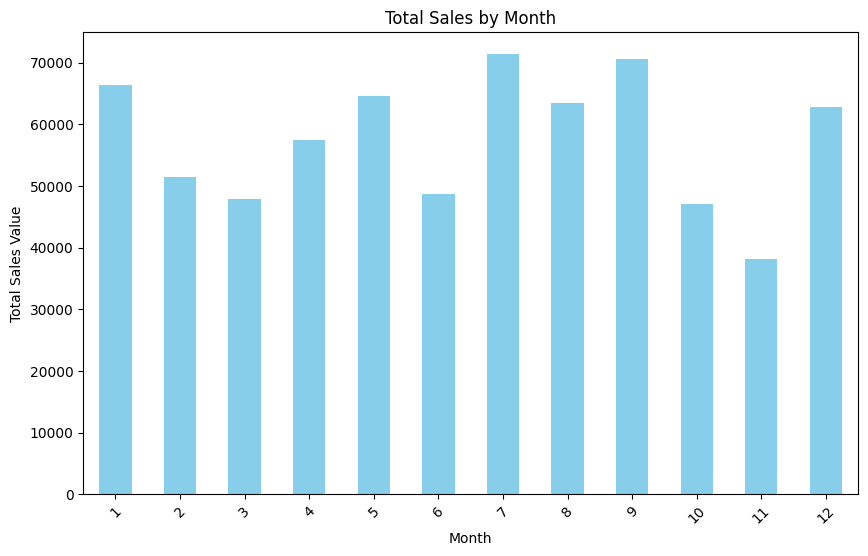

In [35]:
df =full_data
# Convert 'TransactionDate' to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract the month and year from the TransactionDate
df['Month'] = df['TransactionDate'].dt.month
df['Year'] = df['TransactionDate'].dt.year

# Calculate total sales (TotalValue) by month
monthly_sales = df.groupby('Month')['TotalValue'].sum()

# Plot total sales by month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


### Sales by Customer Signup Year

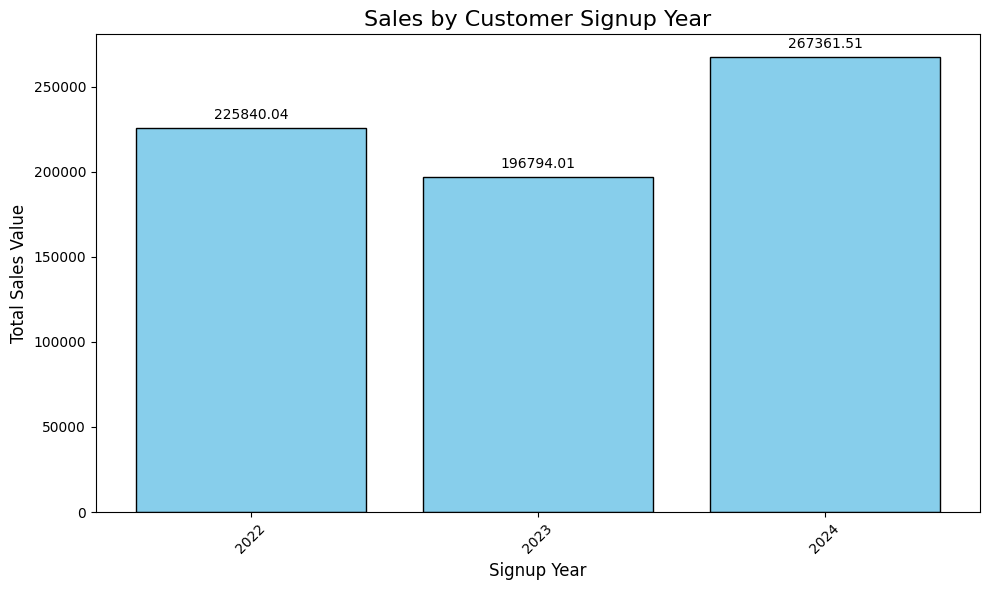

In [36]:
import matplotlib.pyplot as plt

# Extract year from SignupDate and calculate total sales by signup year
full_data['SignupYear'] = full_data['SignupDate'].dt.year
sales_by_signup_year = full_data.groupby('SignupYear')['TotalValue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_signup_year.index, sales_by_signup_year.values, color='skyblue', edgecolor='black')
plt.title('Sales by Customer Signup Year', fontsize=16)
plt.xlabel('Signup Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(sales_by_signup_year.index, rotation=45)
plt.grid(axis='y', linestyle='', alpha=0.7)

# Adding sales values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * max(sales_by_signup_year.values), 
             f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


### Monthly Sales Trend

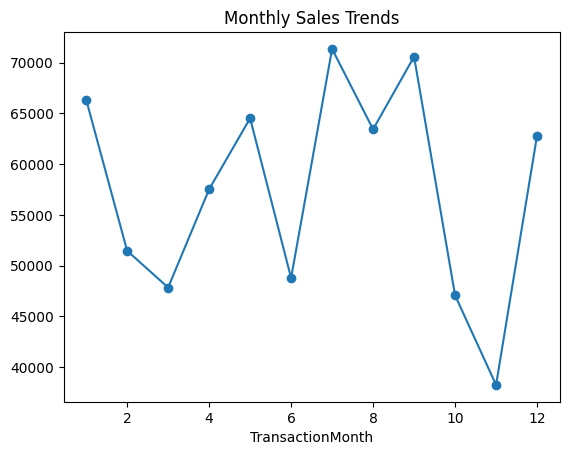

In [37]:
# Monthly sales trends
full_data['TransactionMonth'] = full_data['TransactionDate'].dt.month
monthly_sales = full_data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trends', marker='o')
plt.show()


## Regional Performance

### Number of Transactions by Region

/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_10048/1143308195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_transactions.index, y=region_transactions.values, palette='Blues')


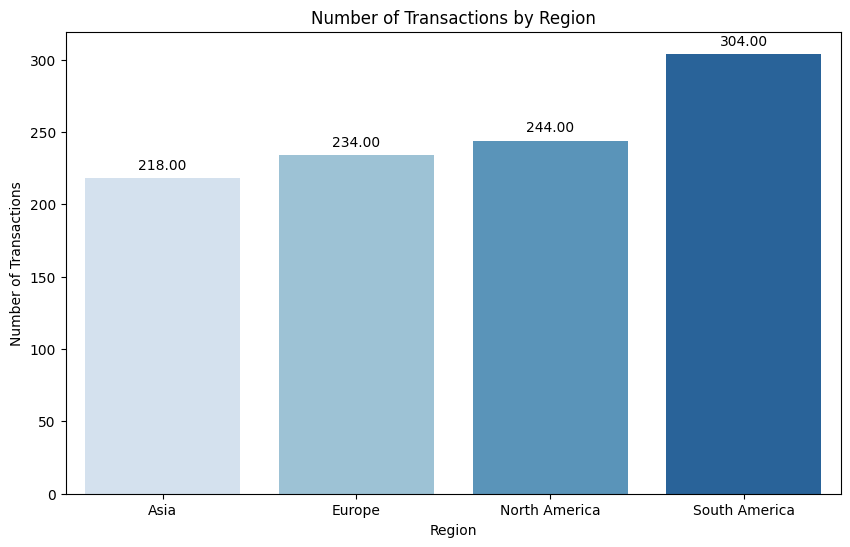

In [39]:
# Grouping by region and calculating total transactions
region_transactions = df.groupby('Region')['TransactionID'].nunique()

# Plot the number of transactions by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transactions.index, y=region_transactions.values, palette='Blues')
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')

# Adding the count above each bar
for i, value in enumerate(region_transactions):
    plt.text(i, value + 0.02 * max(region_transactions), f'{value:.2f}', ha='center', fontsize=10)
plt.show()


### Sales by Region

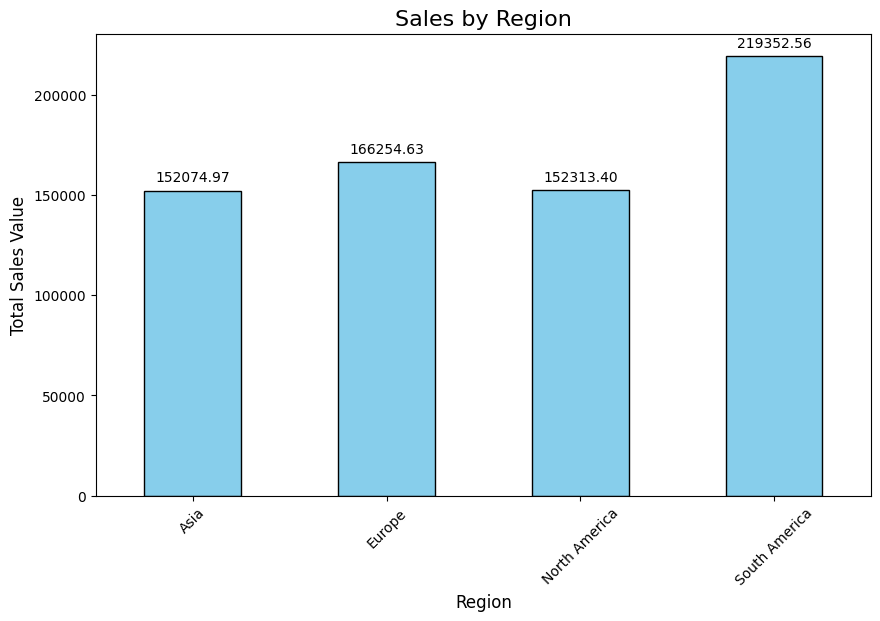

In [ ]:
import matplotlib.pyplot as plt

# Group data by region and calculate total sales
sales_by_region = full_data.groupby('Region')['TotalValue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = sales_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='', alpha=0.7)

# Adding the count above each bar
for i, value in enumerate(sales_by_region):
    plt.text(i, value + 0.02 * max(sales_by_region), f'{value:.2f}', ha='center', fontsize=10)

plt.show()
